### Import Essential Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from six import StringIO
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### About the Dataset

In [2]:
df = pd.read_csv("C:/Users/HP/Desktop/Network Dataset.csv")
df.head(10)

,dt,switch,sourceIP,destinationIP,packetCount,byteCount,duration,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,3,1943,13535,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,2,1943,13531,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,3,1943,13534,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,3,1943,13534,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,3,1943,13534,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,3,1943,13534,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,3,1943,13535,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,3,1943,13535,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,3,1943,13535,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,3,1943,13534,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


#### Dataset Dimensions

In [3]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 66733 rows and 21 columns


#### Concise summary of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66733 entries, 0 to 66732
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dt             66733 non-null  int64  
 1   switch         66733 non-null  int64  
 2   sourceIP       66733 non-null  object 
 3   destinationIP  66733 non-null  object 
 4   packetCount    66733 non-null  int64  
 5   byteCount      66733 non-null  int64  
 6   duration       66733 non-null  int64  
 7   flows          66733 non-null  int64  
 8   packetins      66733 non-null  int64  
 9   pktperflow     66733 non-null  int64  
 10  byteperflow    66733 non-null  int64  
 11  pktrate        66733 non-null  int64  
 12  Pairflow       66733 non-null  int64  
 13  Protocol       66733 non-null  object 
 14  port_no        66733 non-null  int64  
 15  tx_bytes       66733 non-null  int64  
 16  rx_bytes       66733 non-null  int64  
 17  tx_kbps        66733 non-null  int64  
 18  rx_kbp

#### Descriptive statistics of dataset

In [5]:
df.describe()

,dt,switch,packetCount,byteCount,duration,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,66733.000000,66733.000000,66733.000000,6.673300e+04,66733.000000,66733.000000,66733.000000,66733.000000,6.673300e+04,66733.000000,66733.000000,66733.000000,6.673300e+04,6.673300e+04,66733.000000,66227.000000,66227.000000,66733.000000
mean,17708.349093,3.971304,58930.099036,4.986355e+07,293.189921,5.093747,4448.276550,7239.286320,6.231668e+06,240.811757,0.496681,2.285391,8.780695e+07,8.782734e+07,1054.274407,1062.418364,2124.747837,0.444203
std,11365.981343,1.872230,50294.463269,5.073886e+07,263.836408,2.818288,4352.951091,7172.670348,7.736182e+06,239.110195,0.499993,1.046066,1.577416e+08,1.355242e+08,2561.948659,2156.460717,3258.092014,0.496881
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,4.000000,-129952.000000,-1.372656e+08,-4332.000000,0.000000,1.000000,2.668000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,9906.000000,3.000000,5662.000000,1.319004e+06,114.000000,3.000000,1931.000000,30.000000,2.940000e+03,1.000000,0.000000,1.000000,3.972000e+03,3.185000e+03,0.000000,0.000000,0.000000,0.000000
50%,11665.000000,4.000000,53573.000000,3.330440e+07,230.000000,5.000000,2385.000000,8944.000000,7.465930e+06,298.000000,0.000000,2.000000,2.815900e+04,3.020561e+06,0.000000,0.000000,4.000000,0.000000
75%,29292.000000,5.000000,101974.000000,9.567036e+07,374.000000,6.000000,6024.000000,13388.000000,1.425029e+07,446.000000,1.000000,3.000000,1.354664e+08,1.413575e+08,228.000000,807.000000,3838.000000,1.000000
max,34623.000000,10.000000,260001.000000,1.471280e+08,1881.000000,17.000000,18351.000000,18890.000000,1.493182e+07,629.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


#### heatmap of missing values

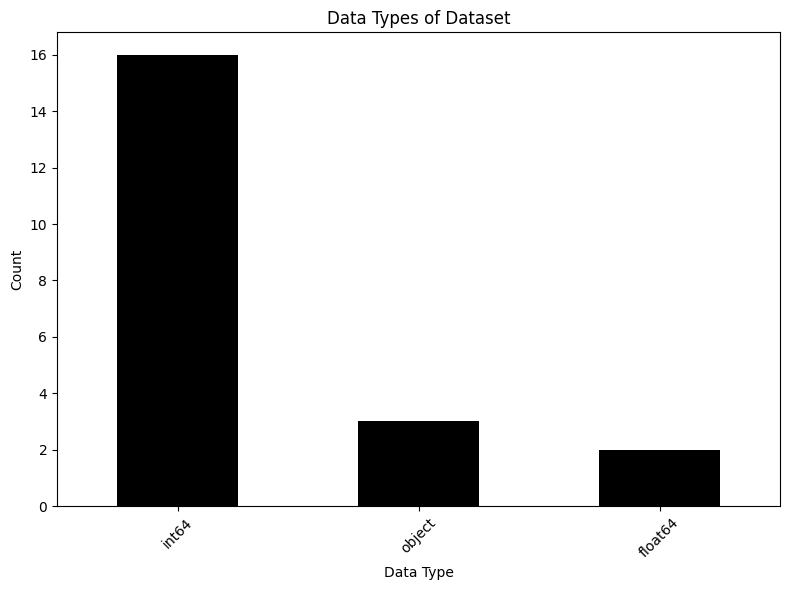

In [7]:
data = pd.read_csv("C:/Users/HP/Desktop/Network Dataset.csv")
data_types = data.dtypes.value_counts()

plt.figure(figsize=(8,6))
data_types.plot(kind='bar', color='black')
plt.title("Data Types of Dataset")
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Count of null values in each feature 

In [8]:
df.isnull().sum()

dt                 0
switch             0
sourceIP           0
destinationIP      0
packetCount        0
byteCount          0
duration           0
flows              0
packetins          0
pktperflow         0
byteperflow        0
pktrate            0
Pairflow           0
Protocol           0
port_no            0
tx_bytes           0
rx_bytes           0
tx_kbps            0
rx_kbps          506
tot_kbps         506
label              0
dtype: int64

In [9]:
(df.isnull().sum()/df.isnull().count())*100

dt               0.000000
switch           0.000000
sourceIP         0.000000
destinationIP    0.000000
packetCount      0.000000
byteCount        0.000000
duration         0.000000
flows            0.000000
packetins        0.000000
pktperflow       0.000000
byteperflow      0.000000
pktrate          0.000000
Pairflow         0.000000
Protocol         0.000000
port_no          0.000000
tx_bytes         0.000000
rx_bytes         0.000000
tx_kbps          0.000000
rx_kbps          0.758246
tot_kbps         0.758246
label            0.000000
dtype: float64

#### Drop rows with null values

In [10]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [11]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt               0
switch           0
sourceIP         0
destinationIP    0
packetCount      0
byteCount        0
duration         0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps          0
tot_kbps         0
label            0
dtype: int64
This Dataframe has 66227 rows and 21 columns after removing null values


#### Distribution of Target Class

In [12]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 44.34 %
Number of DDOS attacks that has not occured : 55.66 %


#### Barplot of Target Class

C:\Users\HP\AppData\Local\Temp\ipykernel_3444\142555624.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100


Text(0, 0.5, 'Frequency %')

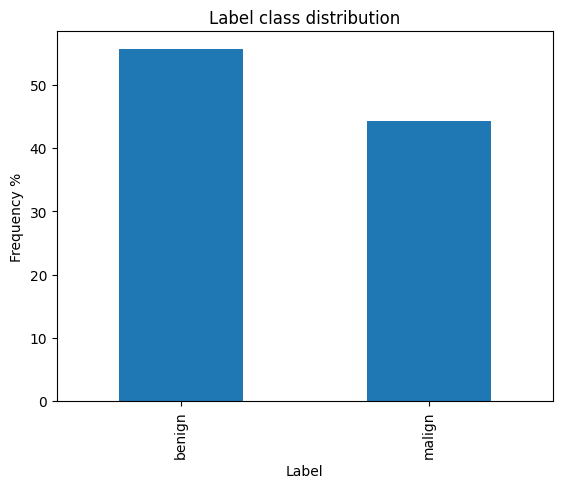

In [13]:
labels = ['benign','malign']
classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

#### Pairplot of select features

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


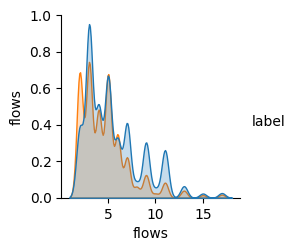

In [14]:
sns.pairplot(df,hue="label",vars=['flows'])

#### Columns in the dataset

In [15]:
df.columns

Index(['dt', 'switch', 'sourceIP', 'destinationIP', 'packetCount', 'byteCount',
       'duration', 'flows', 'packetins', 'pktperflow', 'byteperflow',
       'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes',
       'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

#### Unique values in each column

In [16]:
print(df.apply(lambda col: col.unique()))

dt               [11425, 11605, 11455, 11515, 9906, 11335, 1157...
switch                             [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sourceIP         [10.0.0.1, 10.0.0.2, 10.0.0.4, 10.0.0.10, 10.0...
destinationIP    [10.0.0.8, 10.0.0.7, 10.0.0.3, 10.0.0.5, 10.0....
packetCount      [45304, 126395, 90333, 103866, 85676, 32914, 4...
byteCount        [48294064, 134737070, 96294978, 110721156, 913...
duration         [100, 280, 200, 230, 190, 73, 10, 250, 80, 260...
flows                 [3, 2, 4, 5, 6, 7, 8, 11, 9, 10, 13, 15, 17]
packetins        [1943, 1931, 1790, 1306, 1910, 2242, 2175, 110...
pktperflow       [13535, 13531, 13534, 13533, 13306, 13385, 0, ...
byteperflow      [14428310, 14424046, 14427244, 14426178, 14184...
pktrate          [451, 443, 446, 0, 288, 450, 448, 449, 455, 14...
Pairflow                                                    [0, 1]
Protocol                                          [UDP, TCP, ICMP]
port_no                                            [3, 4, 1, 2

#### Numerical Features

In [17]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 18 and they are : 
 ['dt', 'switch', 'packetCount', 'byteCount', 'duration', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


#### Categorical Features

In [18]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['sourceIP', 'destinationIP', 'Protocol']


#### Number of Unique values in the numerical features 

In [19]:
df[numerical_features].nunique(axis=0)

dt              442
switch           10
packetCount    4819
byteCount      4879
duration        708
flows            13
packetins        90
pktperflow     1088
byteperflow    1334
pktrate         320
Pairflow          2
port_no           5
tx_bytes       6184
rx_bytes       5843
tx_kbps        1201
rx_kbps        1155
tot_kbps       1406
label             2
dtype: int64

#### Discrete numerical features

In [20]:
 discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 4 and they are : 
 ['switch', 'flows', 'Pairflow', 'port_no']


In [21]:
df[discrete_feature].head(10)

,switch,flows,Pairflow,port_no
0,1,3,0,3
1,1,2,0,4
2,1,3,0,1
3,1,3,0,2
4,1,3,0,3
5,1,3,0,1
6,1,3,0,4
7,1,3,0,1
8,1,3,0,2
9,1,3,0,4


#### Continuous features

In [22]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 13 and they are : 
 ['dt', 'packetCount', 'byteCount', 'duration', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


### Exploratory Data Analysis

#### Plotting function definition 

In [23]:
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=df).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=df,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

#### Visualize the distribution of Categorical features

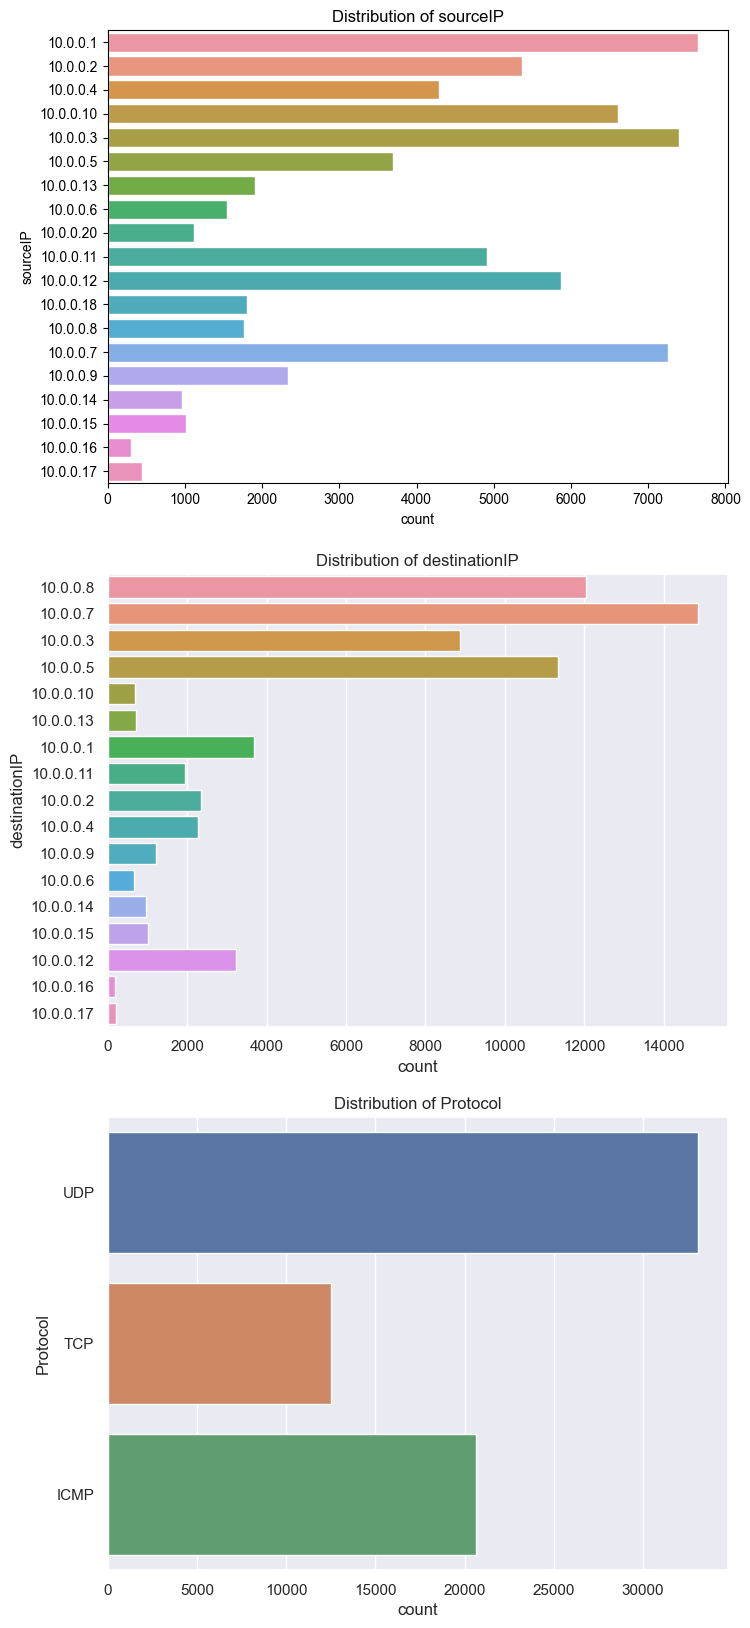

In [24]:
f = plt.figure(figsize=(8,20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

#### Visualize the distribution of numerical discrete features

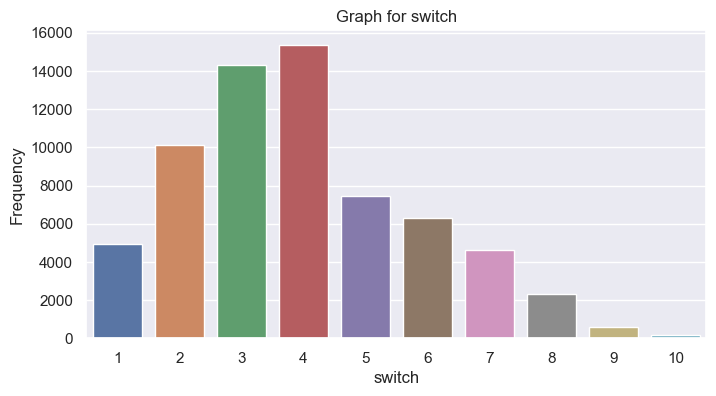

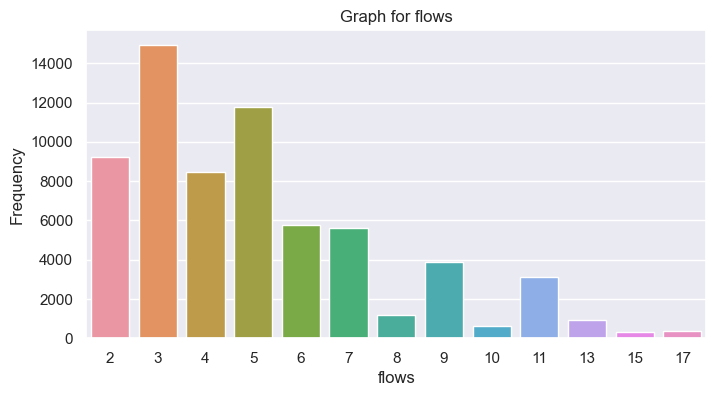

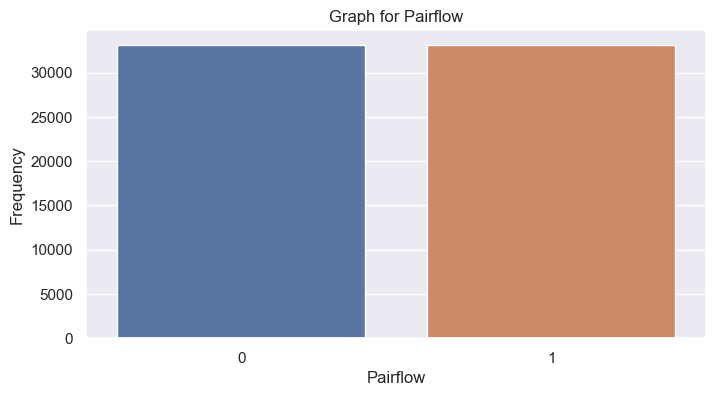

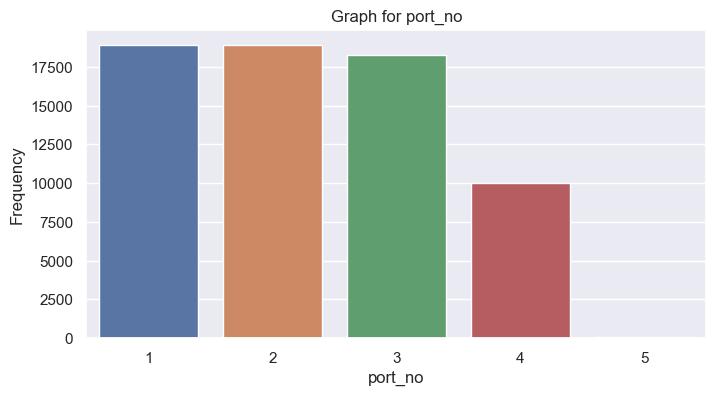

In [25]:
for feature in discrete_feature:
    plt.figure(figsize=(8,4))
    cat_num = df[feature].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num).set(title = "Graph for "+feature, ylabel="Frequency")
    plt.show()

In [26]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

#### Distribution of protocols for malign attacks

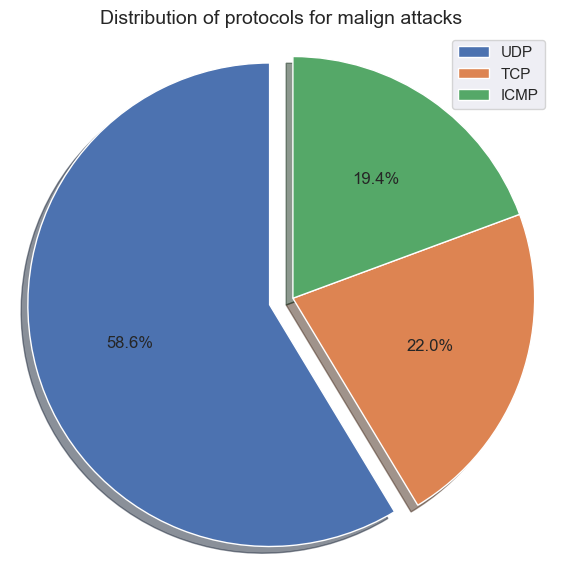

In [27]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

#### Checking for outliers in Packet count feature

In [28]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['sourceIP', 'destinationIP', 'Protocol']


### Encoding categorical features

In [29]:
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))

This Dataframe has 66227 rows and 54 columns after encoding


In [30]:
df.head(10)

,dt,switch,packetCount,byteCount,duration,flows,packetins,pktperflow,byteperflow,pktrate,...,destinationIP_10.0.0.2,destinationIP_10.0.0.3,destinationIP_10.0.0.4,destinationIP_10.0.0.5,destinationIP_10.0.0.6,destinationIP_10.0.0.7,destinationIP_10.0.0.8,destinationIP_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,3,1943,13535,14428310,451,...,False,False,False,False,False,False,True,False,False,True
1,11605,1,126395,134737070,280,2,1943,13531,14424046,451,...,False,False,False,False,False,False,True,False,False,True
2,11425,1,90333,96294978,200,3,1943,13534,14427244,451,...,False,False,False,False,False,False,True,False,False,True
3,11425,1,90333,96294978,200,3,1943,13534,14427244,451,...,False,False,False,False,False,False,True,False,False,True
4,11425,1,90333,96294978,200,3,1943,13534,14427244,451,...,False,False,False,False,False,False,True,False,False,True
5,11425,1,90333,96294978,200,3,1943,13534,14427244,451,...,False,False,False,False,False,False,True,False,False,True
6,11425,1,45304,48294064,100,3,1943,13535,14428310,451,...,False,False,False,False,False,False,True,False,False,True
7,11425,1,45304,48294064,100,3,1943,13535,14428310,451,...,False,False,False,False,False,False,True,False,False,True
8,11425,1,45304,48294064,100,3,1943,13535,14428310,451,...,False,False,False,False,False,False,True,False,False,True
9,11425,1,90333,96294978,200,3,1943,13534,14427244,451,...,False,False,False,False,False,False,True,False,False,True


In [31]:
df.dtypes

dt                           int64
switch                       int64
packetCount                  int64
byteCount                    int64
duration                     int64
flows                        int64
packetins                    int64
pktperflow                   int64
byteperflow                  int64
pktrate                      int64
Pairflow                     int64
port_no                      int64
tx_bytes                     int64
rx_bytes                     int64
tx_kbps                      int64
rx_kbps                    float64
tot_kbps                   float64
label                        int64
sourceIP_10.0.0.10            bool
sourceIP_10.0.0.11            bool
sourceIP_10.0.0.12            bool
sourceIP_10.0.0.13            bool
sourceIP_10.0.0.14            bool
sourceIP_10.0.0.15            bool
sourceIP_10.0.0.16            bool
sourceIP_10.0.0.17            bool
sourceIP_10.0.0.18            bool
sourceIP_10.0.0.2             bool
sourceIP_10.0.0.20  

### Split into Independent and dependent variables

In [32]:
x = df.drop(['label'], axis=1)
y = df['label']

### Normalizing features

In [33]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [70-30]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(46358, 53) (19869, 53)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


x = df.drop(['label'], axis=1).values  
y = df['label'].values

ms = MinMaxScaler()
x = ms.fit_transform(x)

x = x.reshape(x.shape[0], x.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

model = Sequential()

model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), name="Conv1D_Layer_1"))
model.add(MaxPooling1D(pool_size=2, name="MaxPool_1"))

model.add(Conv1D(64, kernel_size=3, activation='relu', name="Conv1D_Layer_2"))
model.add(MaxPooling1D(pool_size=2, name="MaxPool_2"))

model.add(Flatten(name="Flatten_Layer"))
model.add(Dense(128, activation='relu', name="Dense_Layer_1"))
model.add(Dropout(0.5, name="Dropout_Layer"))
model.add(Dense(1, activation='sigmoid', name="Output_Layer"))

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=25,
    verbose=2
)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


(46358, 53, 1) (19869, 53, 1)


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1449/1449 - 32s - 22ms/step - accuracy: 0.9070 - loss: 0.2237 - val_accuracy: 0.9687 - val_loss: 0.0827
Epoch 2/25
1449/1449 - 28s - 19ms/step - accuracy: 0.9685 - loss: 0.0848 - val_accuracy: 0.9822 - val_loss: 0.0523
Epoch 3/25
1449/1449 - 18s - 13ms/step - accuracy: 0.9794 - loss: 0.0578 - val_accuracy: 0.9859 - val_loss: 0.0401
Epoch 4/25
1449/1449 - 22s - 15ms/step - accuracy: 0.9826 - loss: 0.0447 - val_accuracy: 0.9910 - val_loss: 0.0263
Epoch 5/25
1449/1449 - 24s - 16ms/step - accuracy: 0.9855 - loss: 0.0371 - val_accuracy: 0.9904 - val_loss: 0.0260
Epoch 6/25
1449/1449 - 28s - 19ms/step - accuracy: 0.9877 - loss: 0.0329 - val_accuracy: 0.9875 - val_loss: 0.0351
Epoch 7/25
1449/1449 - 41s - 28ms/step - accuracy: 0.9889 - loss: 0.0294 - val_accuracy: 0.9910 - val_loss: 0.0214
Epoch 8/25
1449/1449 - 20s - 14ms/step - accuracy: 0.9893 - loss: 0.0286 - val_accuracy: 0.9937 - val_loss: 0.0177
Epoch 9/25
1449/1449 - 20s - 14ms/step - accuracy: 0.9909 - loss: 0.0234 - val_a

#### Deep Neural Network

In [36]:
Classifier_accuracy = []

## Defining the Deep Neural Network

In [40]:
model = Sequential()
model.add(Dense(28, input_shape=(53,), activation="relu", name="Hidden_Layer_1"))
model.add(Dense(10, activation="relu", name="Hidden_Layer_2"))
model.add(Dense(1, activation="sigmoid", name="Output_Layer"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 28)                  │           1,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 10)                  │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,813 (7.08 KB)

 Trainable params: 1,813 (7.08 KB)

 Non-trainable params: 0 (0.00 B)

## Model fitting 

In [41]:
print(X_train.shape)
print(X_test.shape)

(46358, 53, 1)
(19869, 53, 1)


In [42]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)

history_org = model.fit(
    X_train,
    y_train,
    batch_size=64,  
    epochs=25,
    verbose=2,
    callbacks=[early_stopping, reduce_lr],
    validation_data=(X_test, y_test),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0
)

Epoch 1/25
725/725 - 16s - 22ms/step - accuracy: 0.8693 - loss: 0.3260 - val_accuracy: 0.9342 - val_loss: 0.1652 - learning_rate: 0.0010
Epoch 2/25
725/725 - 3s - 4ms/step - accuracy: 0.9510 - loss: 0.1292 - val_accuracy: 0.9688 - val_loss: 0.0998 - learning_rate: 0.0010
Epoch 3/25
725/725 - 3s - 4ms/step - accuracy: 0.9719 - loss: 0.0864 - val_accuracy: 0.9827 - val_loss: 0.0713 - learning_rate: 0.0010
Epoch 4/25
725/725 - 3s - 4ms/step - accuracy: 0.9825 - loss: 0.0635 - val_accuracy: 0.9886 - val_loss: 0.0541 - learning_rate: 0.0010
Epoch 5/25
725/725 - 3s - 4ms/step - accuracy: 0.9874 - loss: 0.0500 - val_accuracy: 0.9897 - val_loss: 0.0438 - learning_rate: 0.0010
Epoch 6/25
725/725 - 5s - 7ms/step - accuracy: 0.9897 - loss: 0.0397 - val_accuracy: 0.9913 - val_loss: 0.0358 - learning_rate: 0.0010
Epoch 7/25
725/725 - 4s - 5ms/step - accuracy: 0.9926 - loss: 0.0321 - val_accuracy: 0.9893 - val_loss: 0.0388 - learning_rate: 0.0010
Epoch 8/25
725/725 - 5s - 7ms/step - accuracy: 0.9926

## Plotting Loss v/s Epochs 

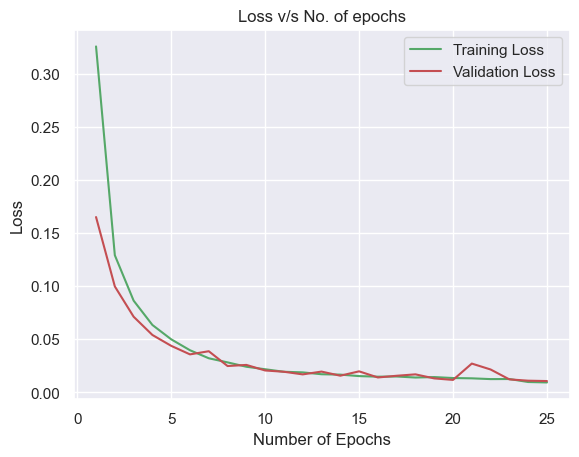

In [43]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Accuracy v/s Epochs 

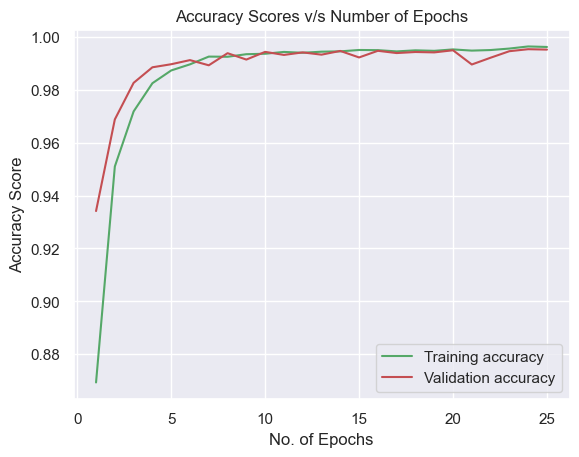

In [44]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Model Evaluation 

In [45]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

621/621 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9931 - loss: 0.0128
Accuracy of Deep neural Network : 99.53


In [46]:
classes = model.predict(X_test)
print(classes)

621/621 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
[[1.0000000e+00]
 [5.3931642e-01]
 [1.0000000e+00]
 ...
 [9.9715680e-01]
 [7.9037141e-05]
 [3.4622866e-13]]


In [47]:
y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [48]:
y_pred[:20]

[1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]

In [49]:
y_test[:20]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0],
      dtype=int64)

## Classification Report 

In [50]:
print(classification_report( y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     11127
      malign       1.00      0.99      0.99      8742

    accuracy                           1.00     19869
   macro avg       1.00      1.00      1.00     19869
weighted avg       1.00      1.00      1.00     19869



## Plotting Confusion Matrix

In [51]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] 
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

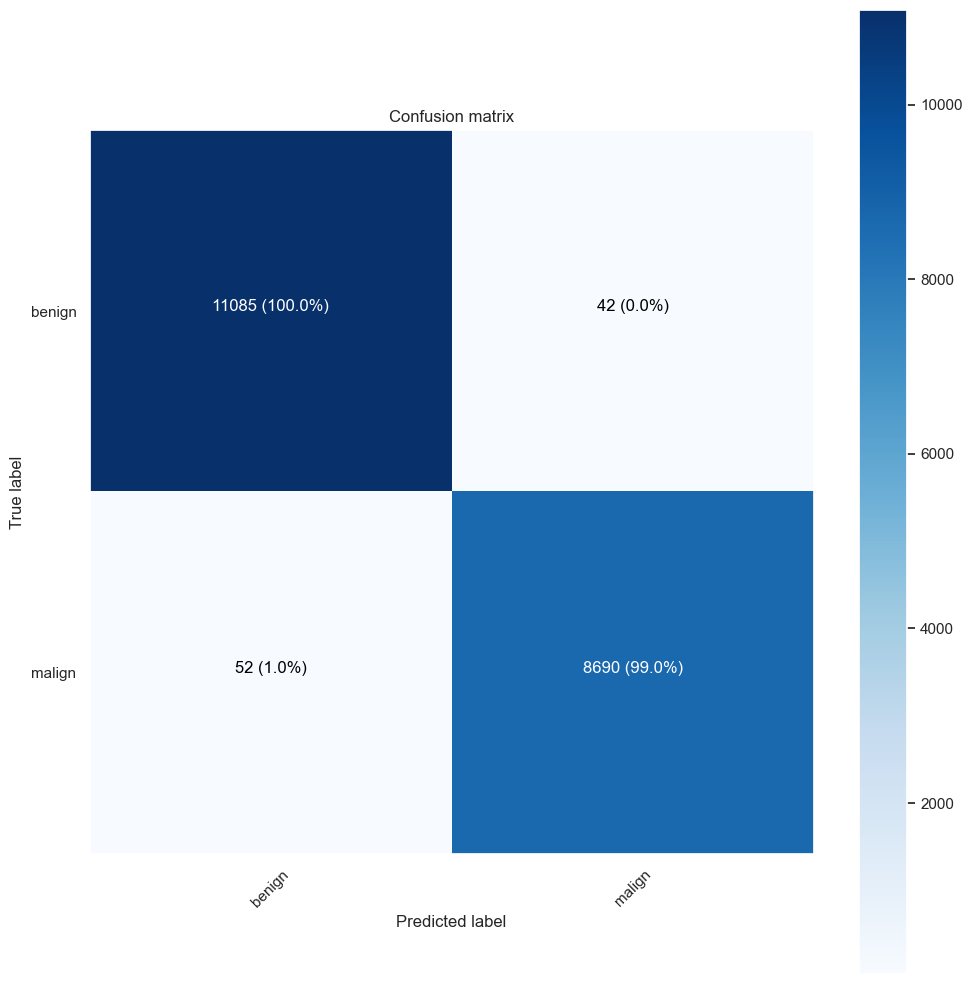

In [52]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = labels)